In [62]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")

In [63]:
set.seed(0)

### Create Random graph using ER model

In [ ]:
g1 = erdos.renyi.game(1000, p=0.003, directed=F)
g2 = erdos.renyi.game(1000, p=0.004, directed=F)
g3 = erdos.renyi.game(1000, p=0.01, directed=F)
g4 = erdos.renyi.game(1000, p=0.05, directed=F)
g5 = erdos.renyi.game(1000, p=0.1, directed=F)
prob_vec <- c(0.003, 0.004,0.01,0.05,0.05)
num_nodes <- 1000

[1] "ER model with prob =0.003000 "


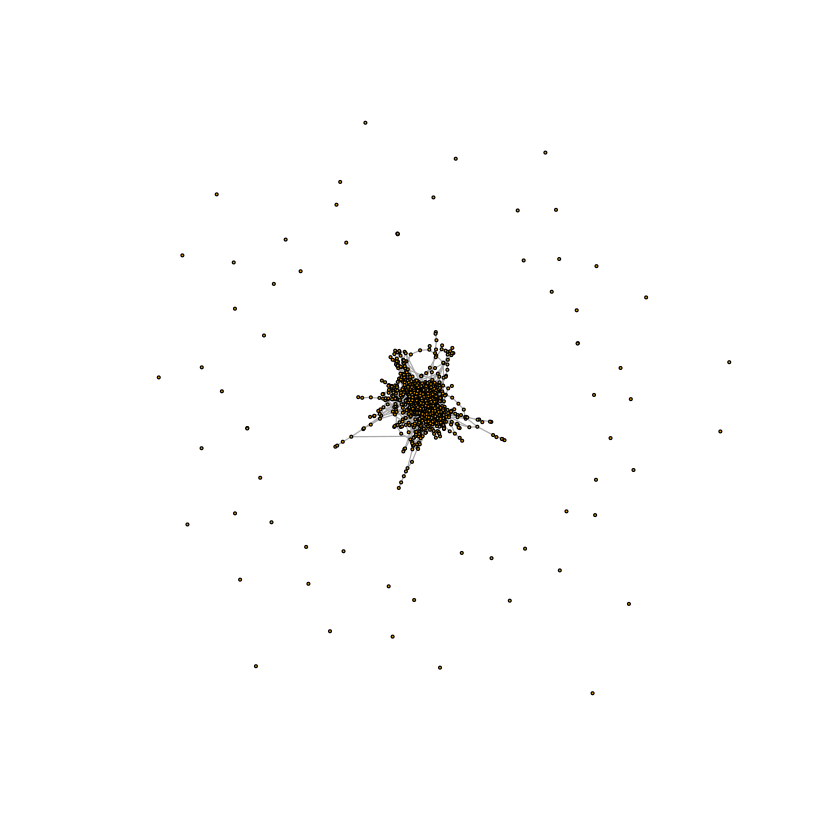

[1] "prob =0.003000 , mean = 2.944000 , variance = 3.087952 "
[1] "--------------------"

[1] "ER model with prob =0.004000 "


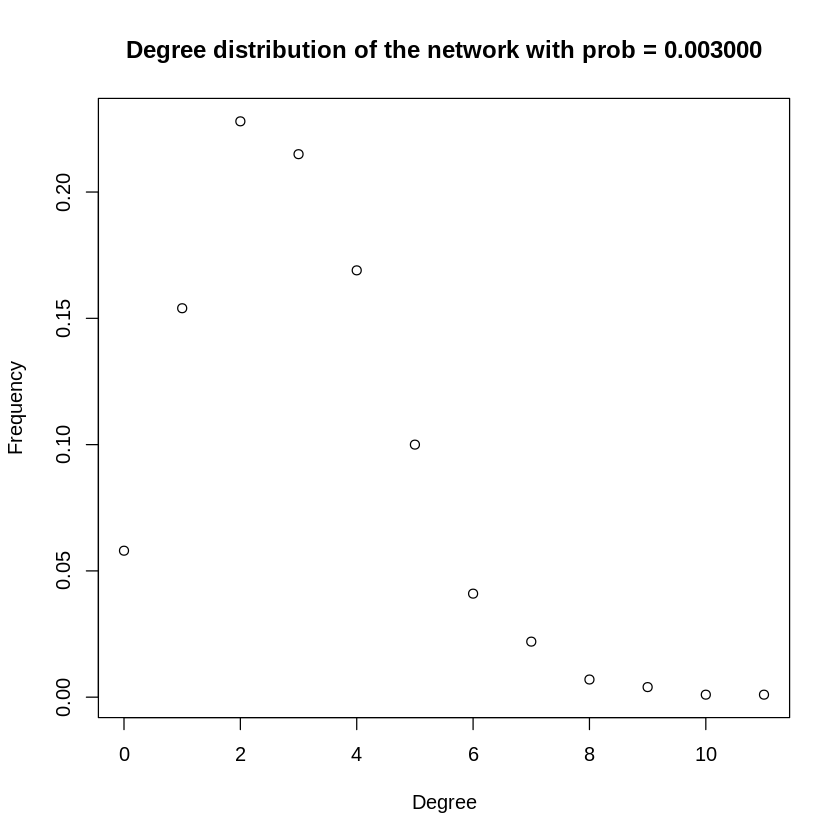

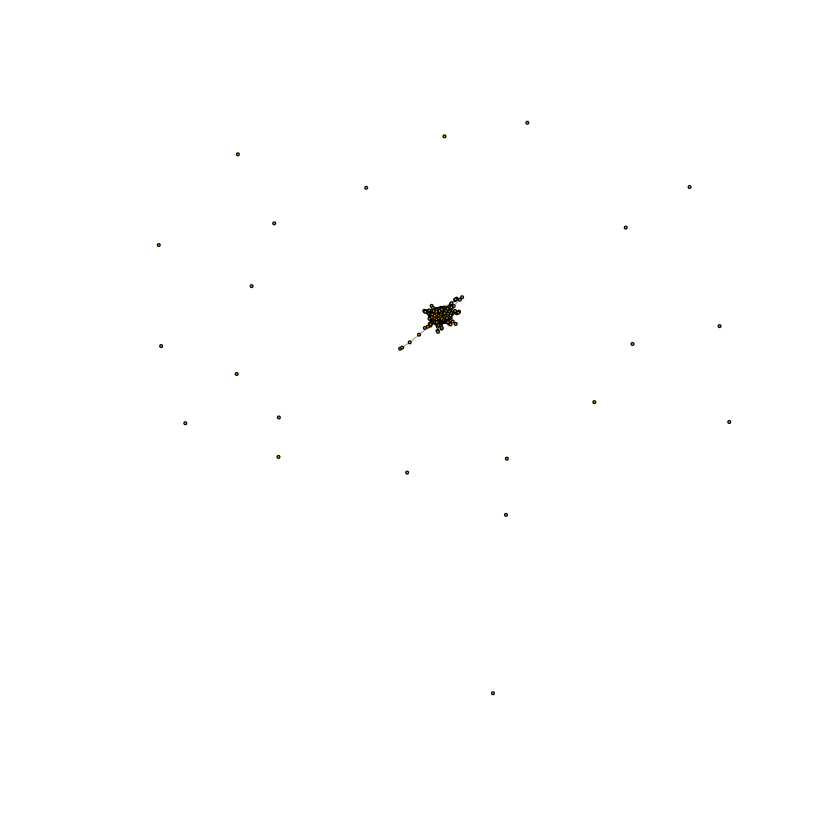

[1] "prob =0.004000 , mean = 4.014000 , variance = 4.023828 "
[1] "--------------------"

[1] "ER model with prob =0.010000 "


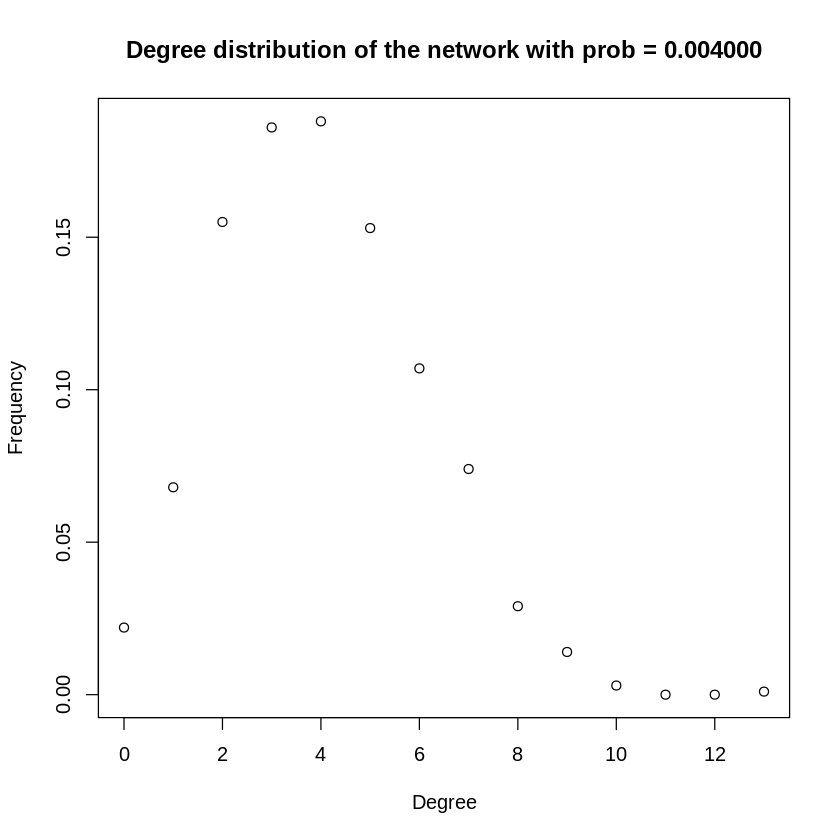

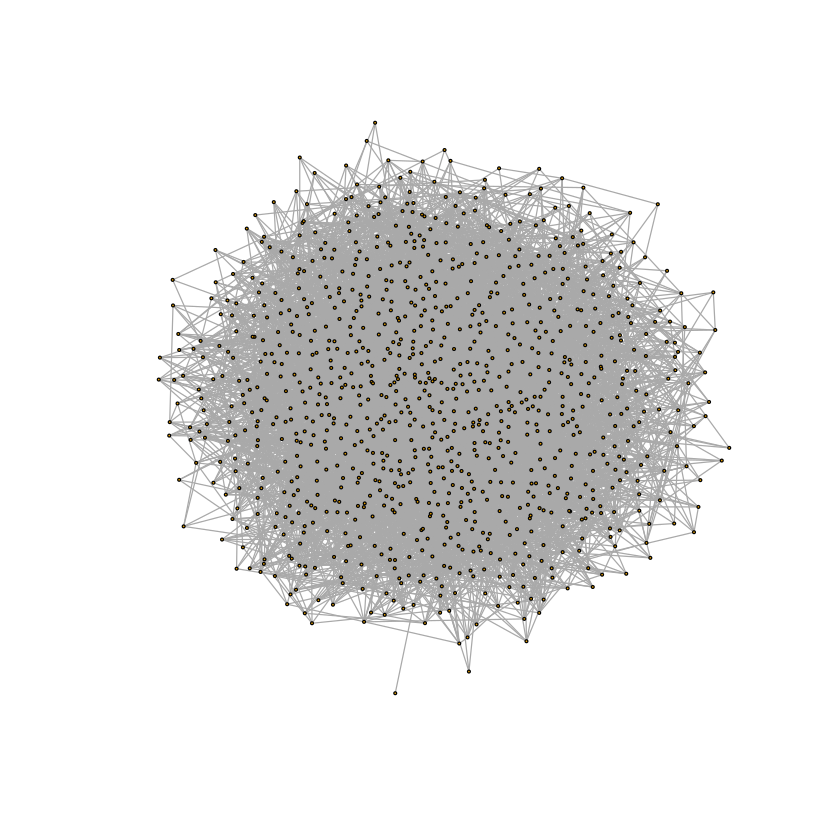

[1] "prob =0.010000 , mean = 9.960000 , variance = 9.287688 "
[1] "--------------------"

[1] "ER model with prob =0.050000 "


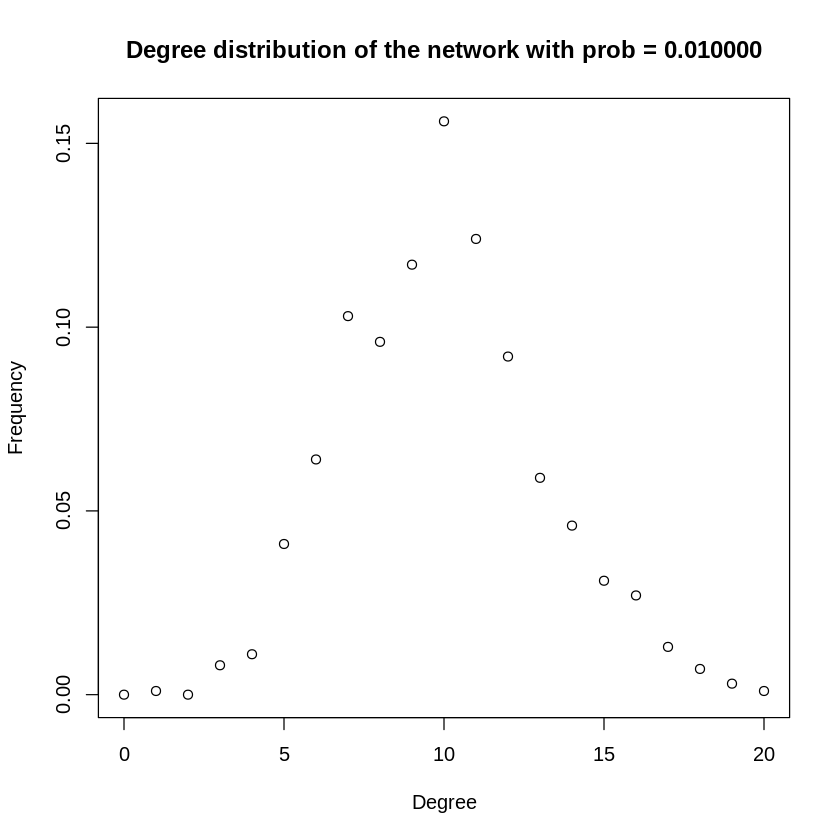

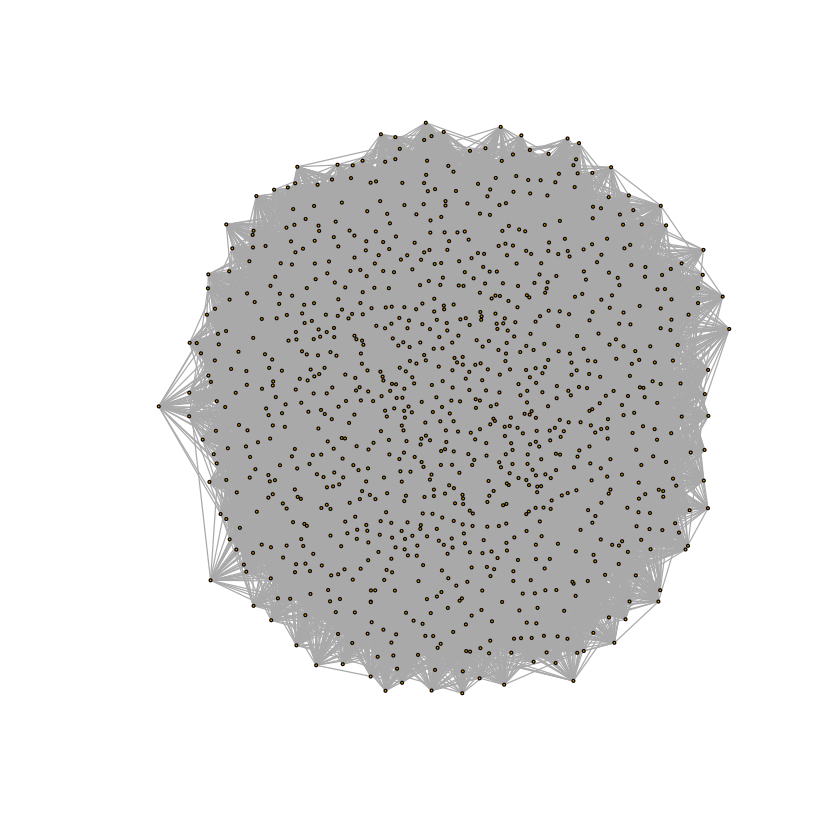

[1] "prob =0.050000 , mean = 49.418000 , variance = 48.589866 "
[1] "--------------------"

[1] "ER model with prob =0.050000 "


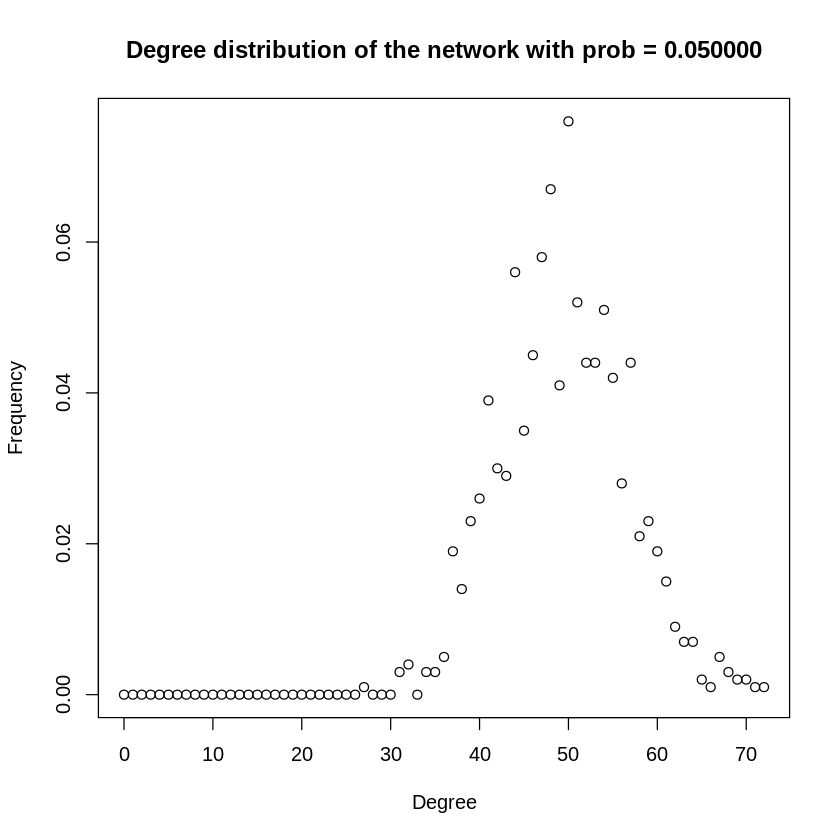

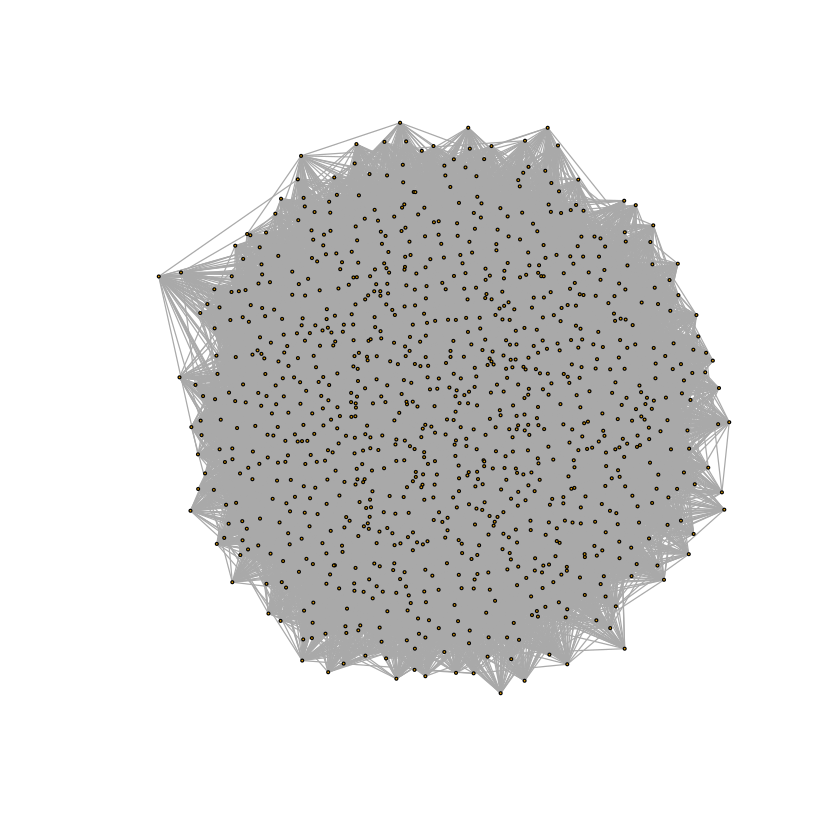

[1] "prob =0.050000 , mean = 49.874000 , variance = 47.389514 "
[1] "--------------------"



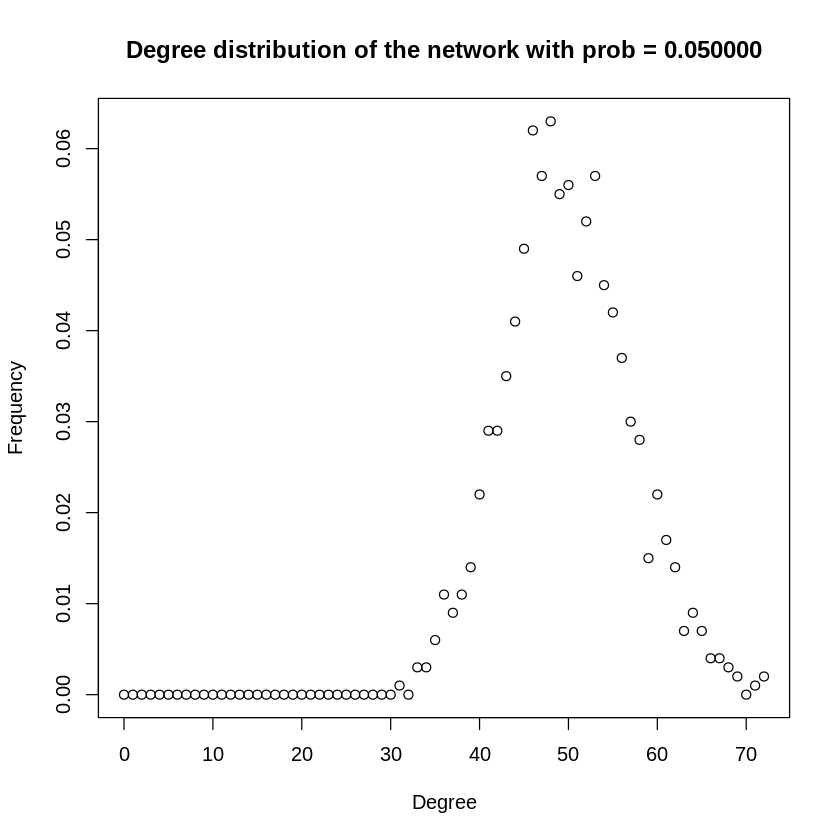

In [ ]:

for(prob in prob_vec) {
    print(sprintf("ER model with prob =%f ",prob))
    g <- erdos.renyi.game(num_nodes, p=prob, directed=F)
    plot(g, vertex.size=1, vertex.label=NA)
    plot(seq_along(degree.distribution(g)) - 1, degree.distribution(g),main=sprintf("Degree distribution of the network with prob = %f",prob),xlab="Degree",ylab="Frequency")
    print(sprintf("prob =%f , mean = %f , variance = %f ",prob,  mean(degree(g)), var(degree(g))))
    print('--------------------')
    cat("\n")
    # sprintf("variance = %f", var(degree(g)))
}

### Giant connected component

In [ ]:
for(prob in prob_vec)
{
    num_connected_graph <- 0
    for (i in 1:1000)
    {
        g <- erdos.renyi.game(num_nodes, p=prob, directed=F)
        if(is.connected(g))
        {
            num_connected_graph <- num_connected_graph + 1
        }
    }
    prob_connected <- num_connected_graph/1000.0
    g_components <- clusters(g)
    ind <- which.max(g_components$csize)
    gcc <- induced.subgraph(g,which(g_components$membership == ind))
    dia <- diameter(gcc)
    print(sprintf("ER model generated with prob =%f , Prob that network connected = %f , Diameter of GCC = %d ",prob,  prob_connected, dia))
    cat("\n")
}

[1] "ER model generated with prob =0.003000 , Prob that network connected = 0.000000 , Diameter of GCC = 13 "

[1] "ER model generated with prob =0.004000 , Prob that network connected = 0.000000 , Diameter of GCC = 11 "

[1] "ER model generated with prob =0.010000 , Prob that network connected = 0.962000 , Diameter of GCC = 5 "

[1] "ER model generated with prob =0.050000 , Prob that network connected = 1.000000 , Diameter of GCC = 3 "

[1] "ER model generated with prob =0.050000 , Prob that network connected = 1.000000 , Diameter of GCC = 3 "



### Normalized GCC

In [20]:
pmin <- 0 
pmax <- 0.01
prob_vec <- seq(from = pmin, to = pmax, by = 0.0001)
num_network_per_prob <- 100.0
nodes <- 1000

len_gcc <- length(prob_vec) * num_network_per_prob
gcc_size <- rep(0.05, len_gcc) # initialize a vec to save gcc for each net
x <- rep(prob_vec, each = num_network_per_prob) # repeating prob vec to create x cord for graph 
j <- 1
k <- 1
gcc_size_avg <- rep(0.05, length(prob_vec))
for(prob in prob_vec)
{
    gcc_size_avg[k] <- 0
    for(i in 1:num_network_per_prob)
    {
        g <- erdos.renyi.game(nodes, p=prob, directed=F)
        g_components <- clusters(g)
        idx <- which.max(g_components$csize)
        gcc <- induced.subgraph(g,which(g_components$membership == idx))
        gcc_size[j] <- vcount(gcc) / nodes
        gcc_size_avg[k] <- gcc_size_avg[k] + gcc_size[j]
        j <- j+1 
    }
    gcc_size_avg[k] <- gcc_size_avg[k] / num_network_per_prob
    k <- k + 1 
}

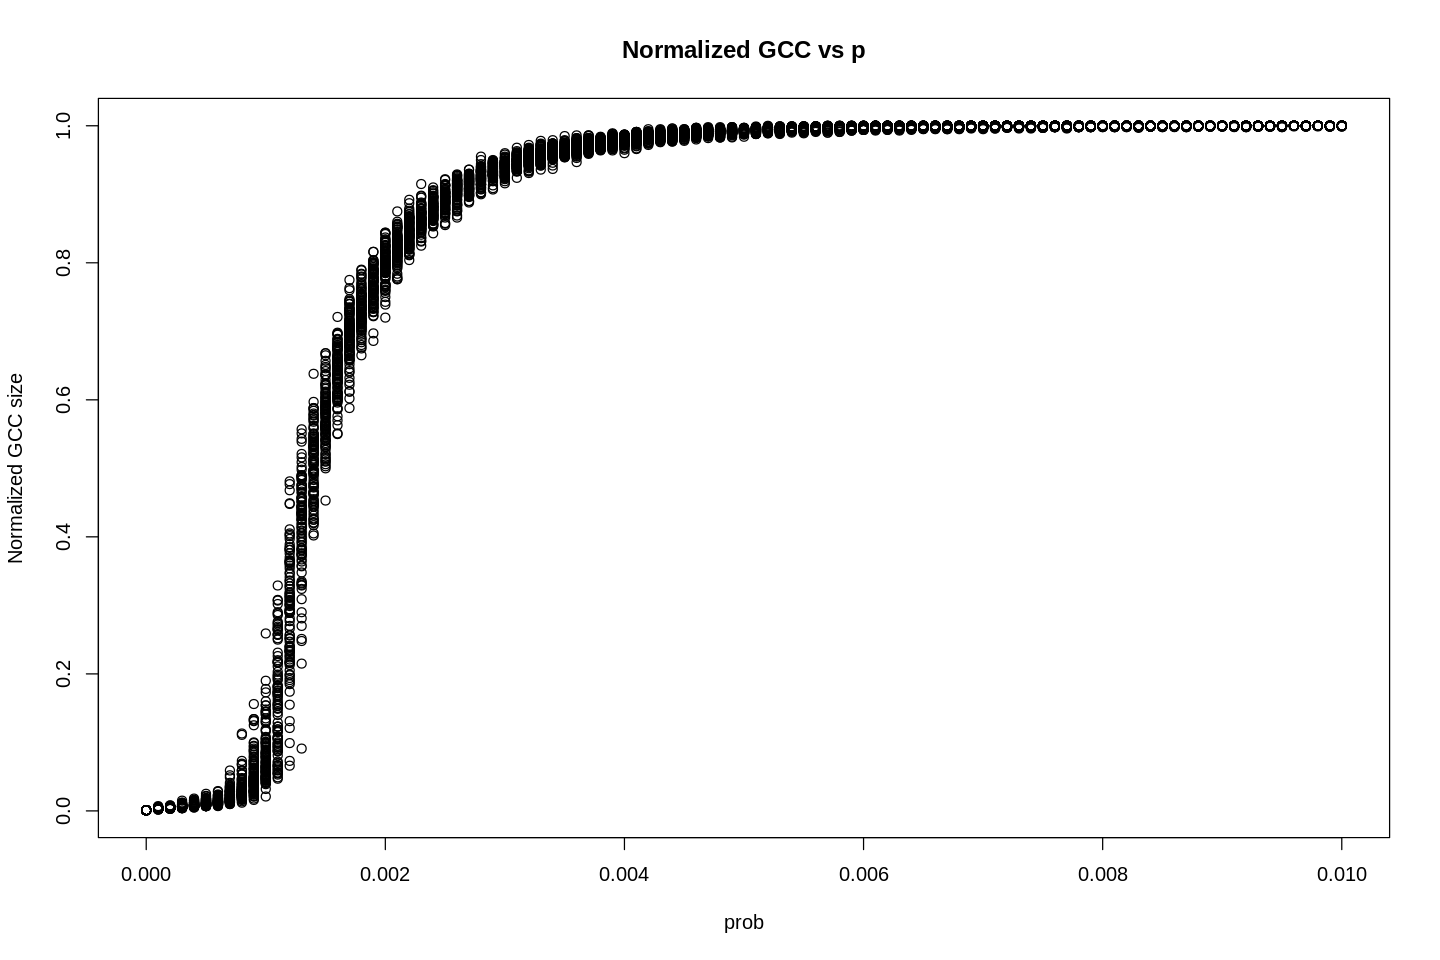

In [21]:
options(repr.plot.width=12, repr.plot.height=8)
plot(x,gcc_size,main ="Normalized GCC vs p",xlab = "prob", ylab = "Normalized GCC size")

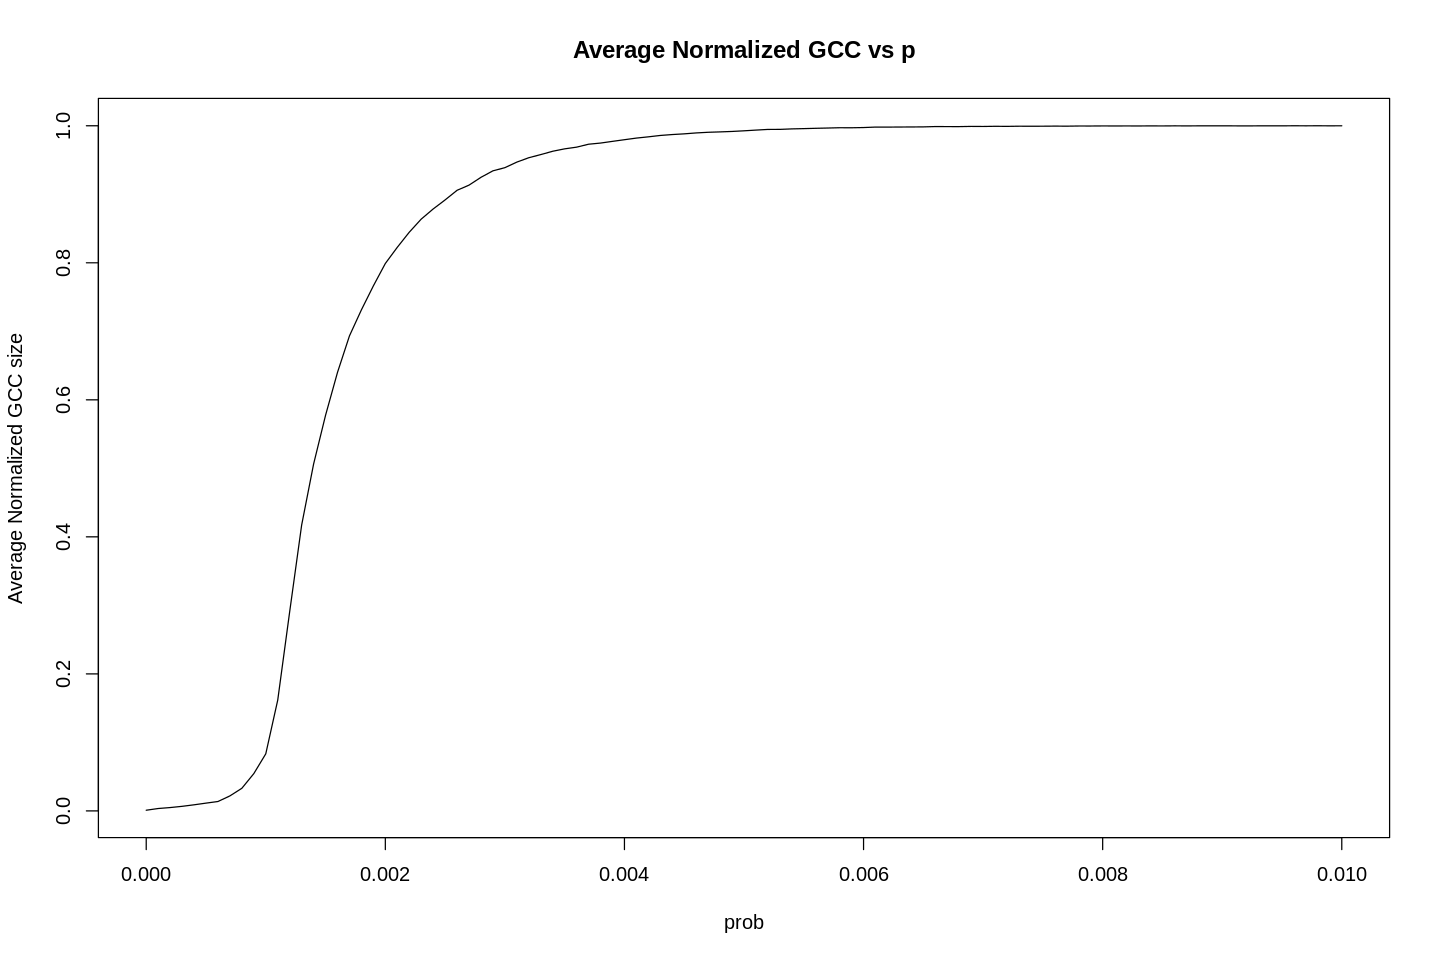

In [22]:
options(repr.plot.width=12, repr.plot.height=8)
plot(prob_vec,gcc_size_avg,main ="Average Normalized GCC vs p",xlab = "prob", ylab = "Average Normalized GCC size", type="l")

In [ ]:
num_connected_graph <- 0
for (i in 1:1000)
{
    g <- erdos.renyi.game(num_nodes, p=0.01, directed=F)
    if(is.connected(g))
    {
        num_connected_graph <- num_connected_graph + 1
    }
}
prob_connected <- num_connected_graph/1000.0

In [ ]:
print(prob_connected)

[1] 0.952


### GCC vs No of nodes

In [49]:
Nmin <- 100 
Nmax <- 10000
N_vec <- seq(from = Nmin, to = Nmax, by = 100)
N_len <- length(N_vec)
c_vec <- c(0.5,1.0, 1.1,1.2,1.3)
c_len <- length(c_vec)
gcc_size <- matrix(1.5, nrow=c_len, ncol=N_len)
num_network_per_prob <- 100.0

In [52]:
i <- 1
for(c in c_vec)
{
    j <- 1
    for(n in N_vec)
    {
        prob <- c/n
        gcc_size[i,j] <- 0
        for(k in 1:num_network_per_prob)
        {
            g <- erdos.renyi.game(n, p=prob, directed=F)
            g_components <- clusters(g)
            idx <- which.max(g_components$csize)
            gcc <- induced.subgraph(g,which(g_components$membership == idx))
            gcc_size[i,j] <- gcc_size[i,j] + vcount(gcc)
        }
        gcc_size[i,j] <- gcc_size[i,j] / num_network_per_prob
        j <- j + 1
    }
    i <- i +1
}

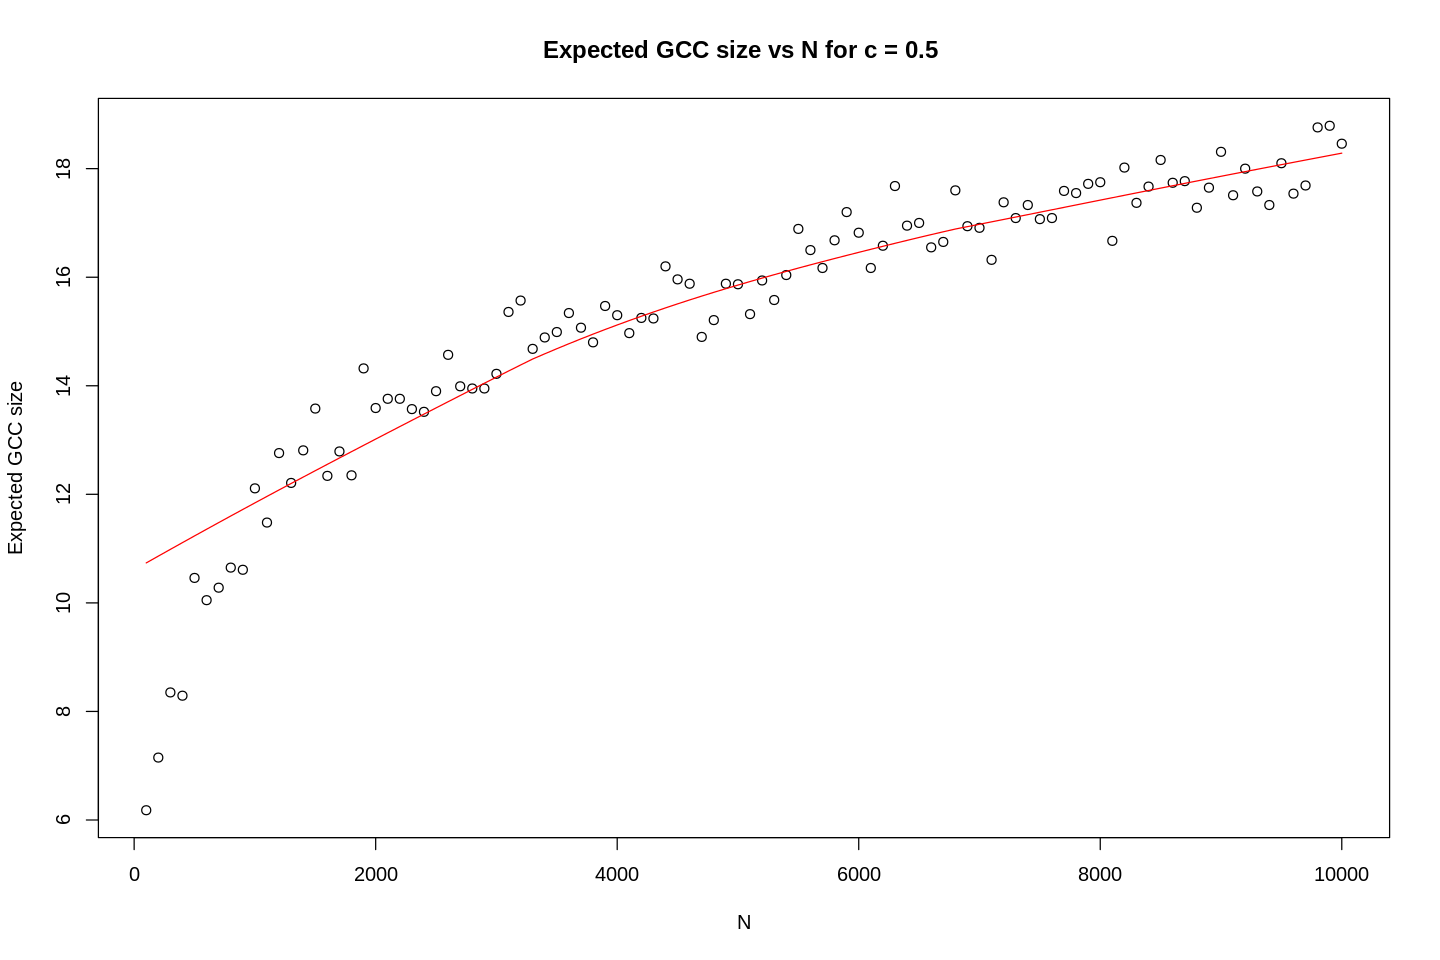

In [56]:
options(repr.plot.width=12, repr.plot.height=8)
plot(N_vec,gcc_size[1,],main ="Expected GCC size vs N for c = 0.5 ",xlab = "N", ylab = "Expected GCC size")
lines(lowess(N_vec,gcc_size[1,]), col="red")

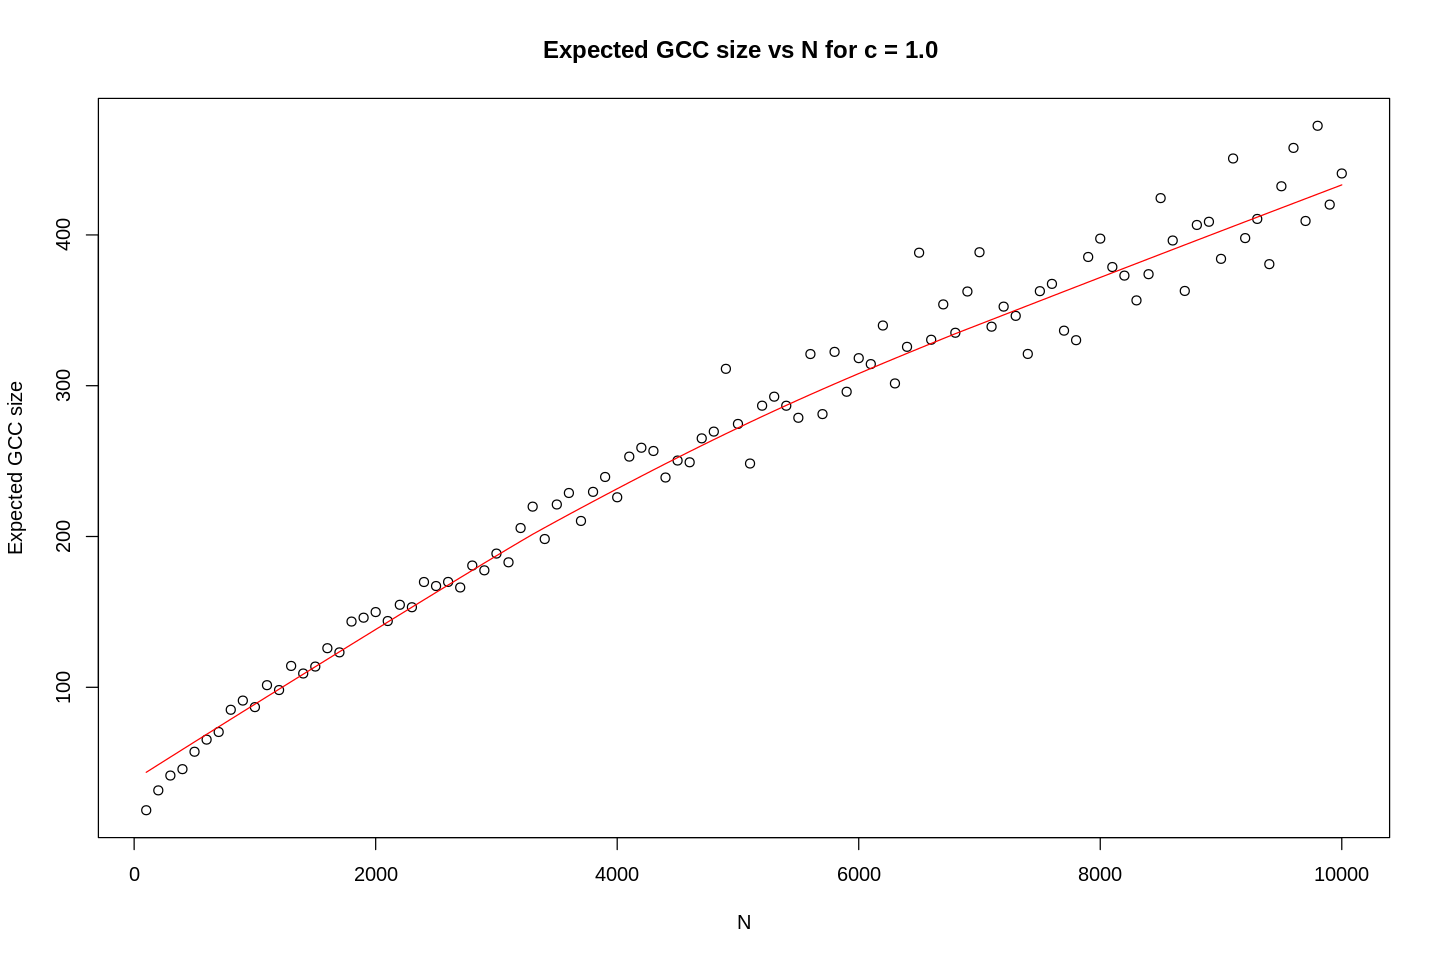

In [55]:
options(repr.plot.width=12, repr.plot.height=8)
plot(N_vec,gcc_size[2,],main ="Expected GCC size vs N for c = 1.0 ",xlab = "N", ylab = "Expected GCC size")
lines(lowess(N_vec,gcc_size[2,]), col="red")

null device 
          1

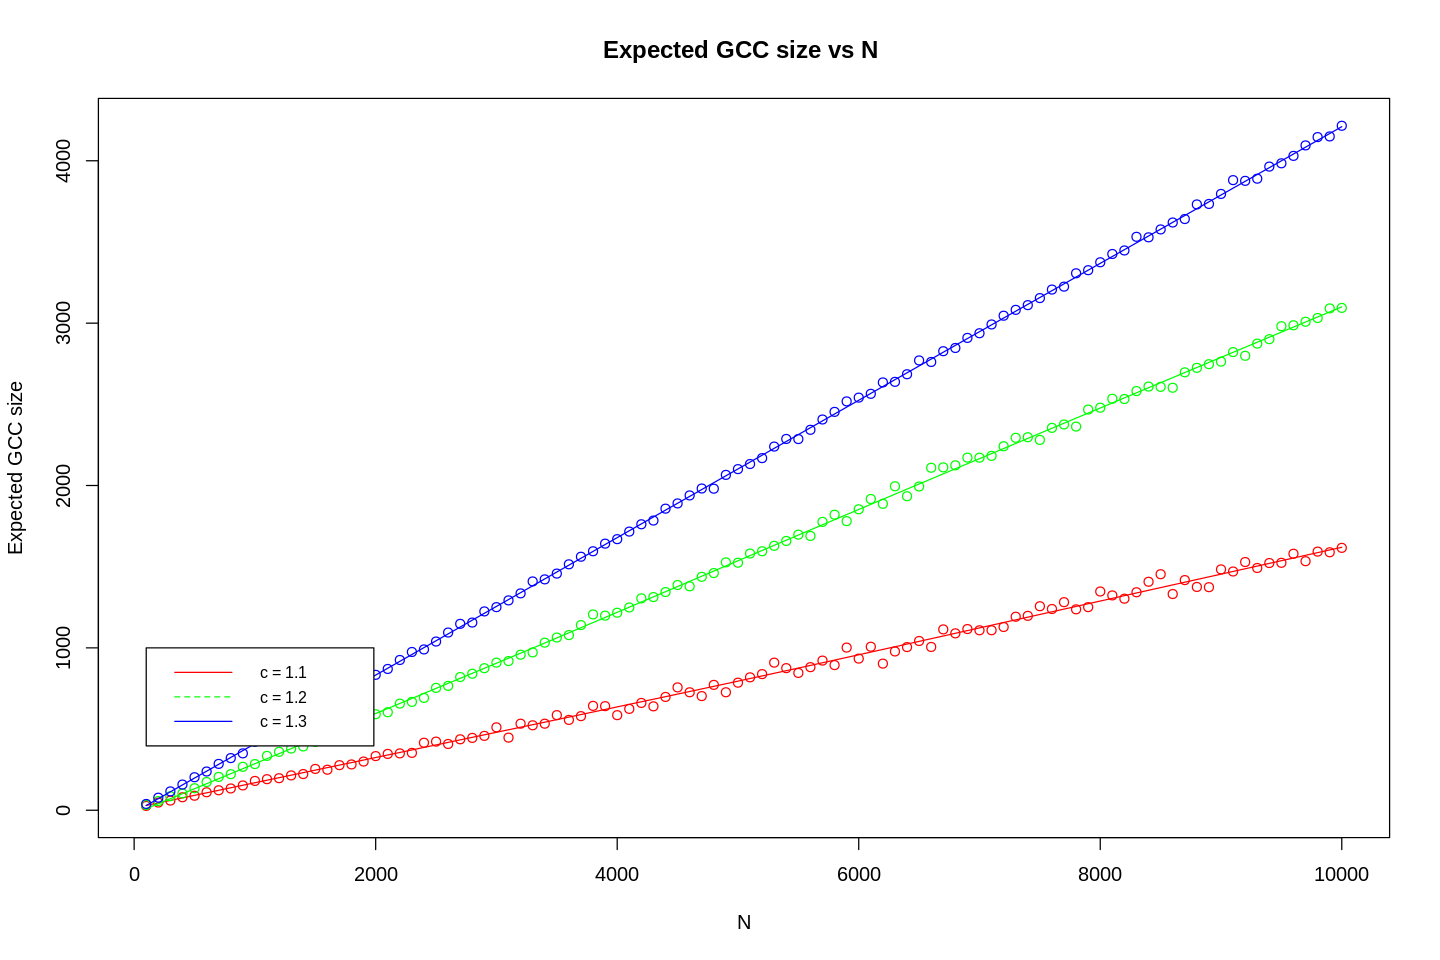

In [61]:
plot(0,0,xlim = c(Nmin,Nmax),ylim = c(0,max(gcc_size)),type = "n",main ="Expected GCC size vs N ",xlab = "N", ylab = "Expected GCC size")

cl <- rainbow(3)

for (i in 1:3){
    lines(N_vec,gcc_size[i+2,],col = cl[i],type = 'b')
    lines(lowess(N_vec,gcc_size[i+2,]), col=cl[i])
}
legend(100, 1000, legend=c("c = 1.1", "c = 1.2","c = 1.3"),
       col=cl, lty=1:2, cex=0.8)
dev.off()

### **Q2.1)** Random walk on ER model

In [116]:
if (!require("pracma")) install.packages("pracma")
library ("pracma")
if (!require("Matrix")) install.packages("matrix")
library ("Matrix")
set.seed(0)
# if (!require("resample")) install.packages("resample")
# library('resample')

Loading required package: resample

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘resample’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [71]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    # print(adj)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    # print(z)
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [91]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    visited_nodes <- seq(from = 1, to = num_steps, by = 1) #stores nodes visited at a step in a random walk
    for(i in 1:num_steps){
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF <- transition_matrix[v, ]
        # print(PMF)
        v <- sample(1:vcount(g), 1, prob = PMF)
        visited_nodes[i] = v        
    }
    
    return(visited_nodes)
}

In [92]:
gcc_of_graph = function(g)
{
    if(is_connected(g)) return (g)
    g_components <- clusters(g)
    idx <- which.max(g_components$csize)
    gcc <- induced.subgraph(g,which(g_components$membership == idx))
    return (gcc)
}

In [133]:
stats_of_graph = function(g,num_steps=100,iter=1000)
{
    set.seed(0)
    gcc <- gcc_of_graph(g)
    transition_matrix <- create_transition_matrix(gcc)
    print("Transition matrix created ")
    dist <- matrix(NA, nrow=iter, ncol=num_steps)
    end_nodes <- array(1:iter)
    print(sprintf("Length of endnode = %d",length(end_nodes)))
    for( i in 1:iter)
    {
        start_node <- sample(1:vcount(gcc), 1)
        visited_nodes <- random_walk(gcc, num_steps, start_node, transition_matrix)
        end_nodes[i] <- visited_nodes[num_steps]
        dist[i,] <- shortest.paths(gcc,visited_nodes,start_node)
    }
    print("distance matrix created ")
    plot(colMeans(dist), type="b", main = "<s(t)> v/s t", xlab = "t", ylab = "<s(t)>")
    # lines(lowess(colMeans(dist)), col="red")
    plot(colVars(dist), type="b", main = "standard deviation σ(s(t))^2  v/s t", xlab = "t", ylab = "σ(s(t))^2")
    # lines(lowess(colVars(dist)), col="red")
    return (end_nodes)
}

In [134]:
num_nodes <- 1000
prob_conn <- 0.01
num_steps <- 100
iter <- 100

[1] "Transition matrix created "
[1] "Length of endnode = 100"
[1] "distance matrix created "


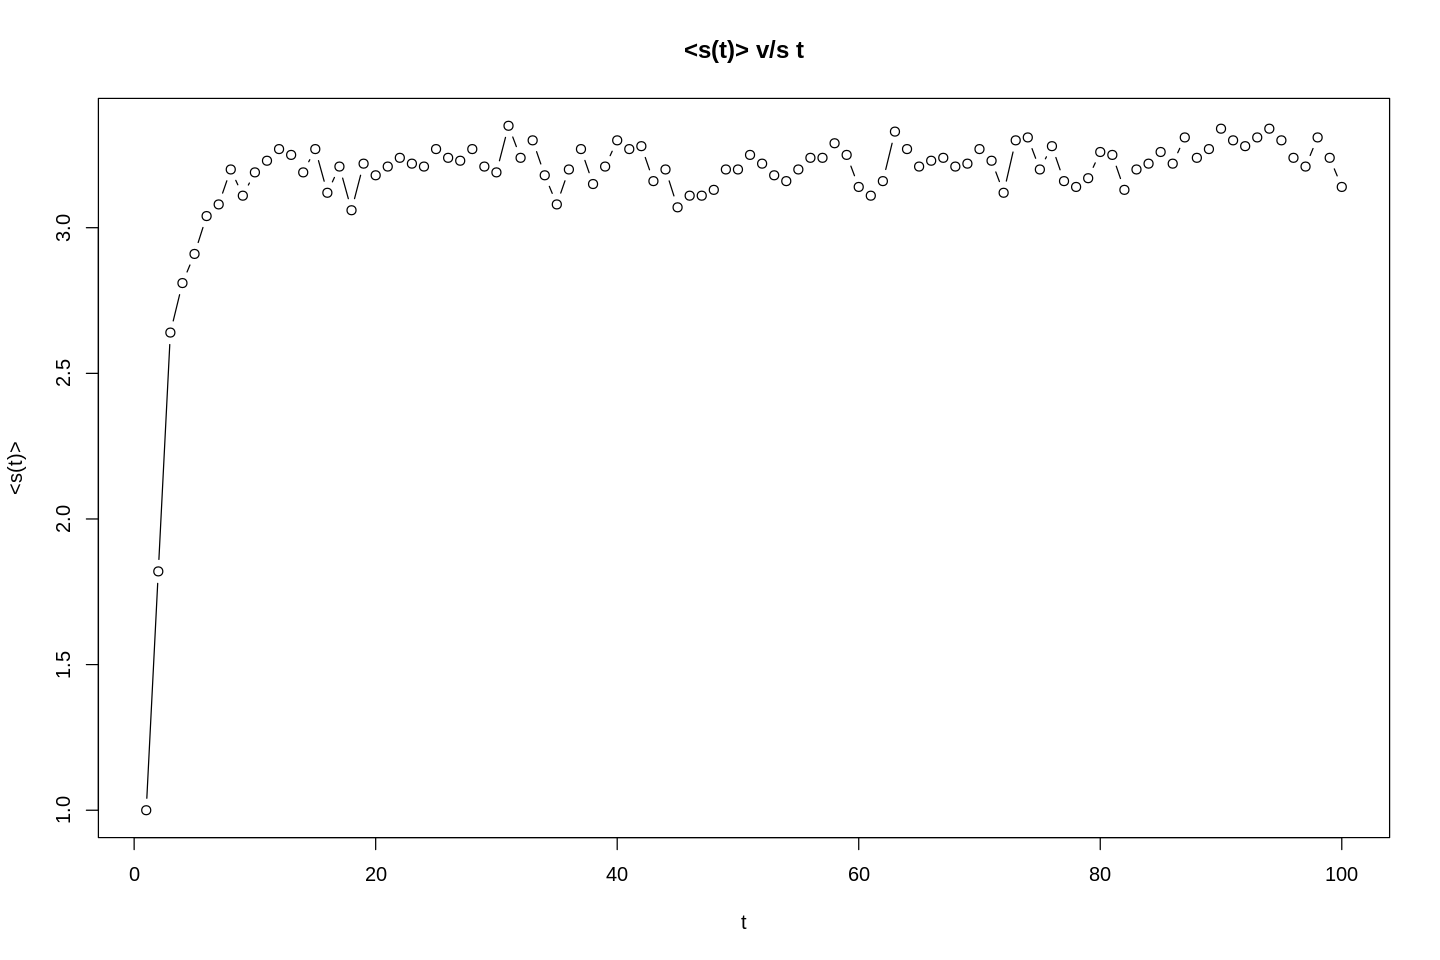

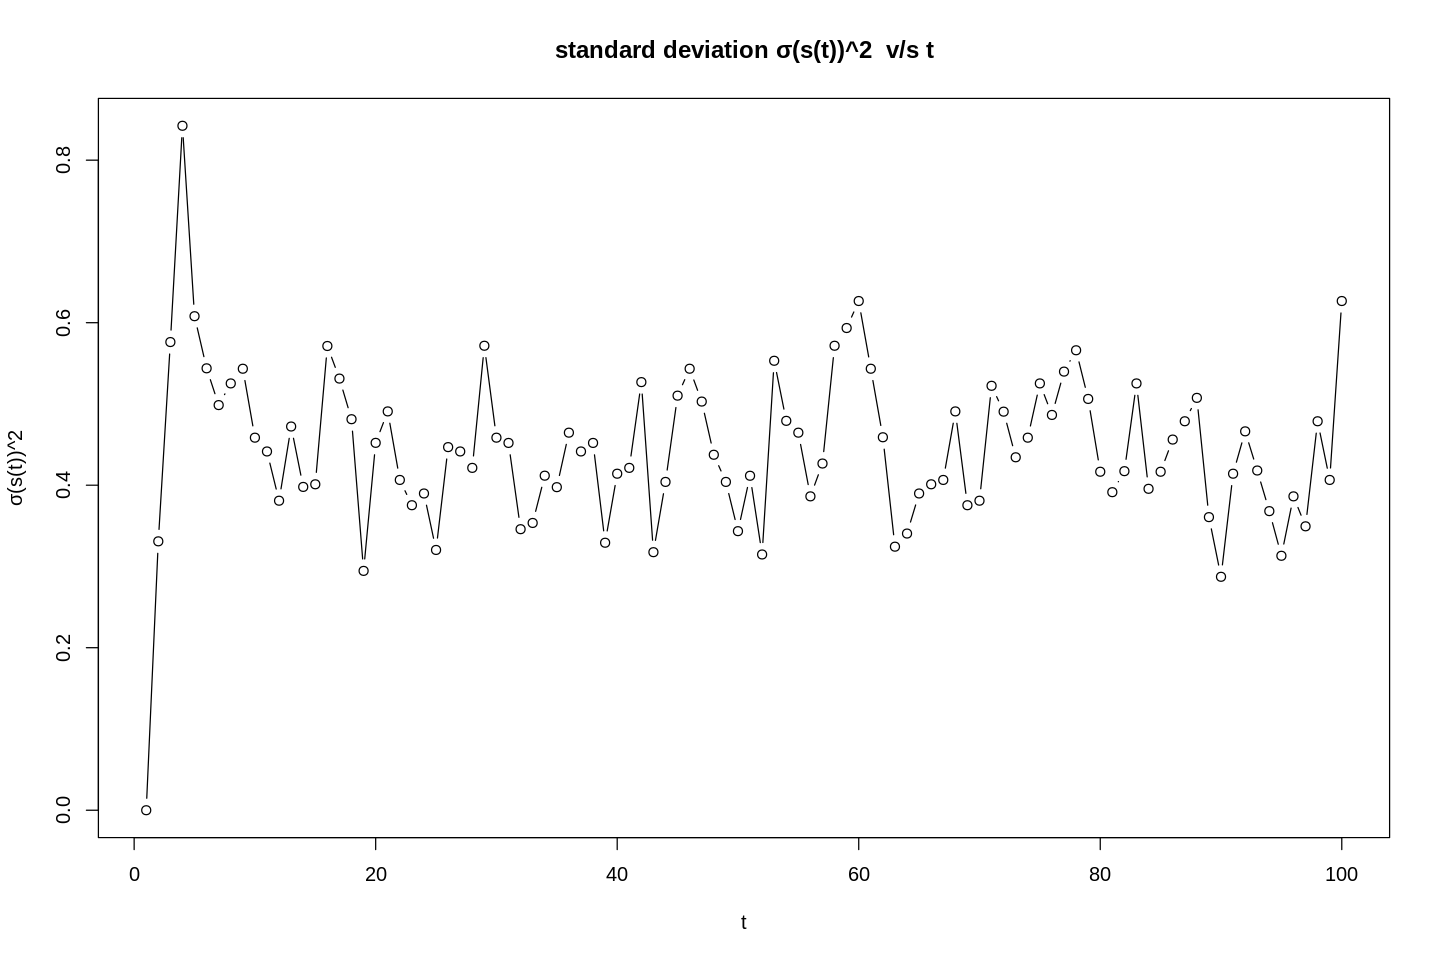

In [135]:
#part 2.1.a)
g1 = erdos.renyi.game(num_nodes, p=prob_conn, directed=F)
end_nodes <- stats_of_graph(g1,num_steps,iter)

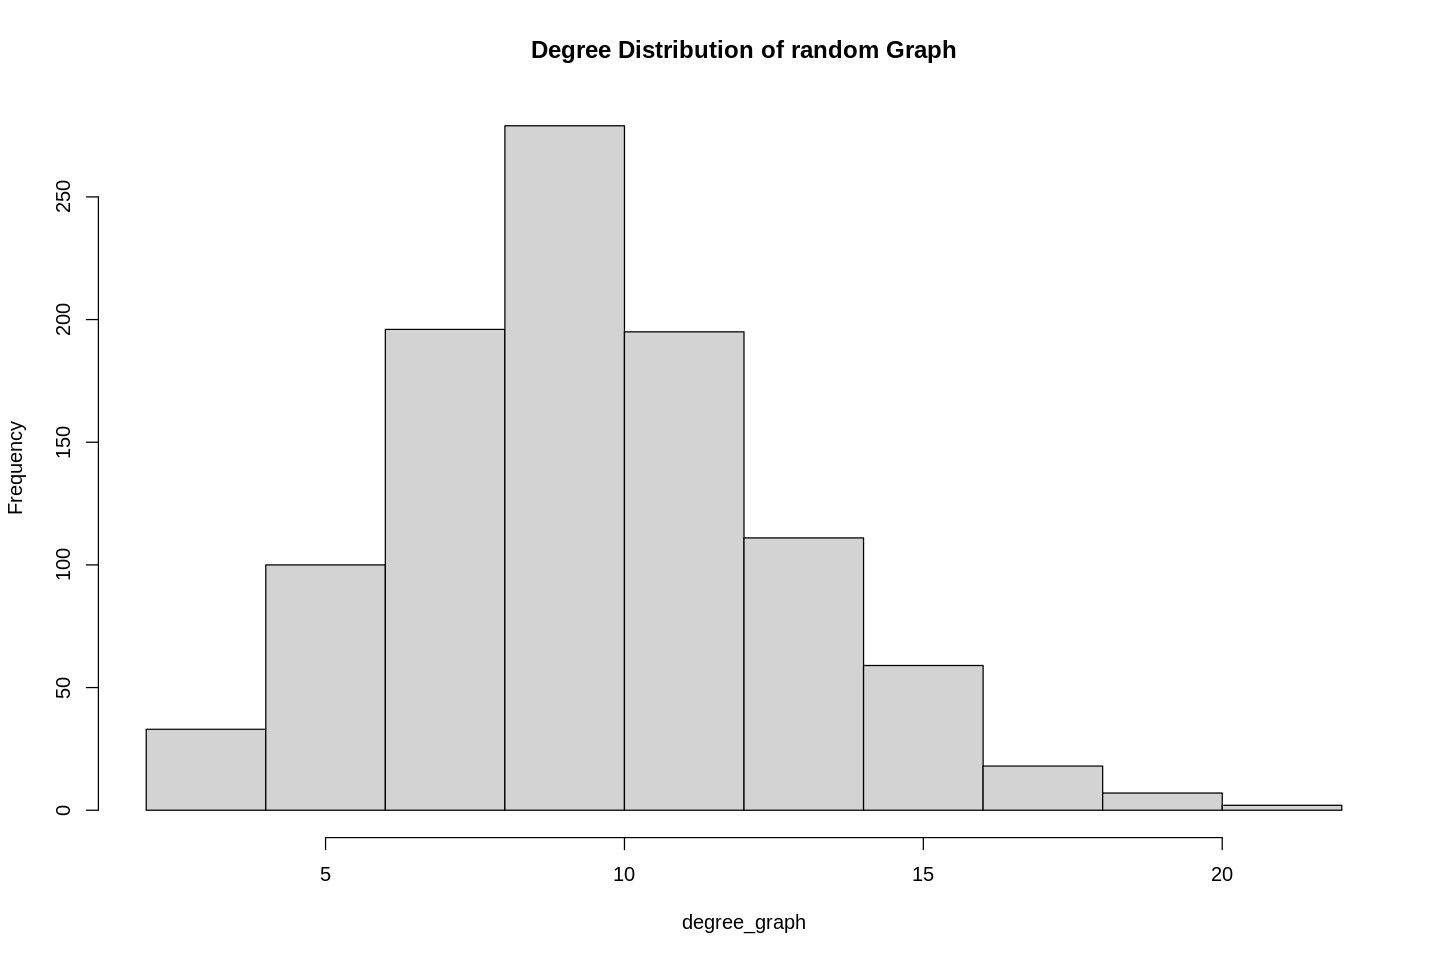

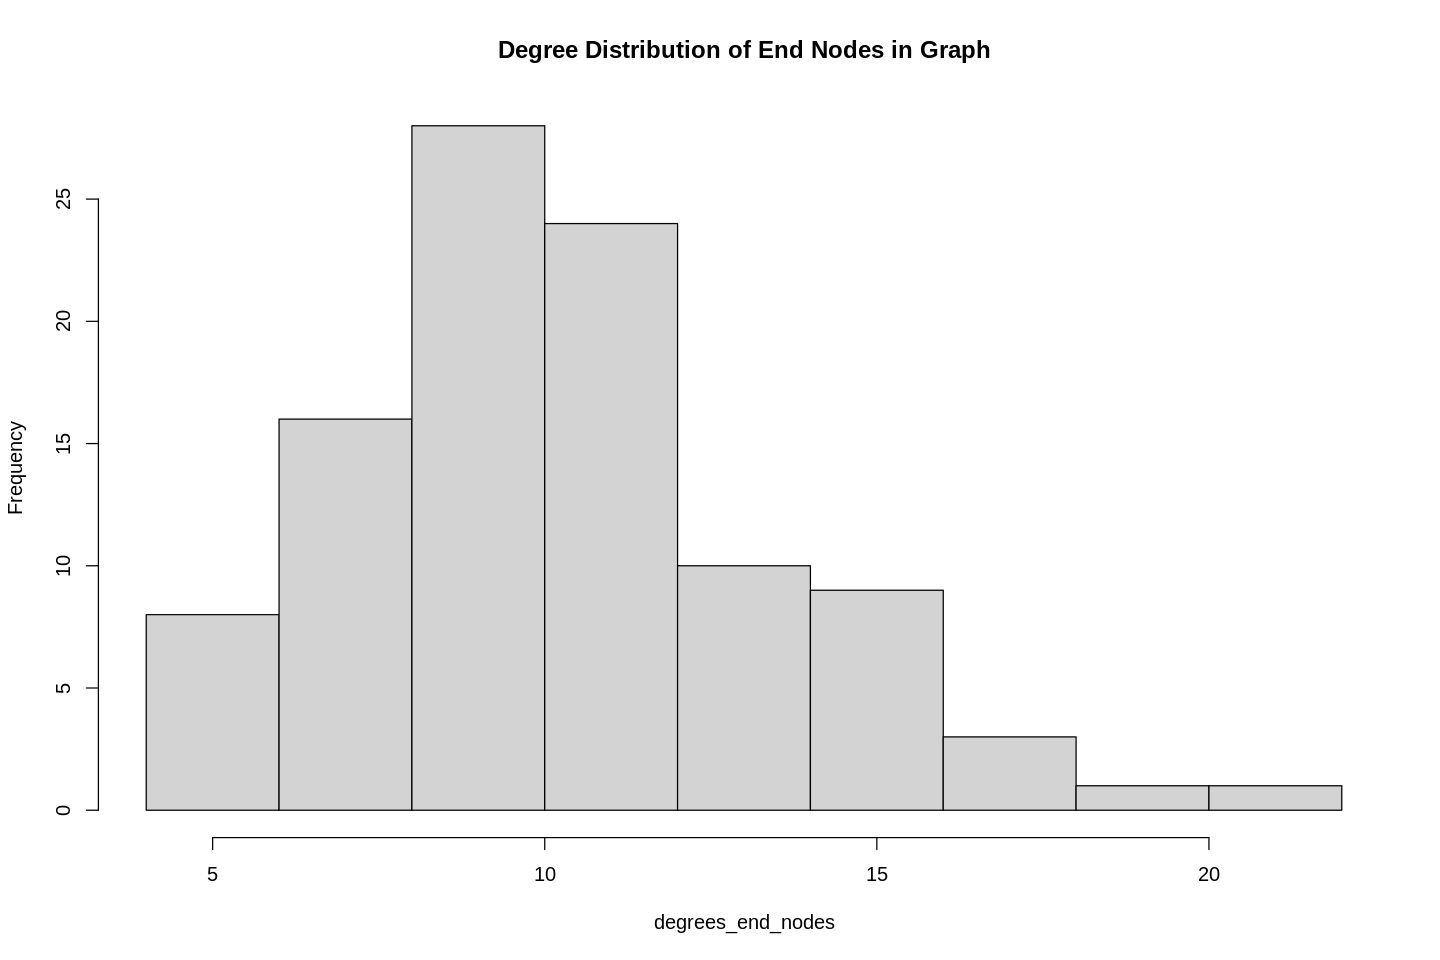

In [137]:
#part 2.1.c) degree distribution 
degree_graph <- degree(g1)
hist(degree_graph, main = "Degree Distribution of random Graph")

degrees_end_nodes <- degree(g1, end_nodes)
hist(degrees_end_nodes, main = "Degree Distribution of End Nodes in Graph")


[1] "Transition matrix created "
[1] "Length of endnode = 100"
[1] "distance matrix created "


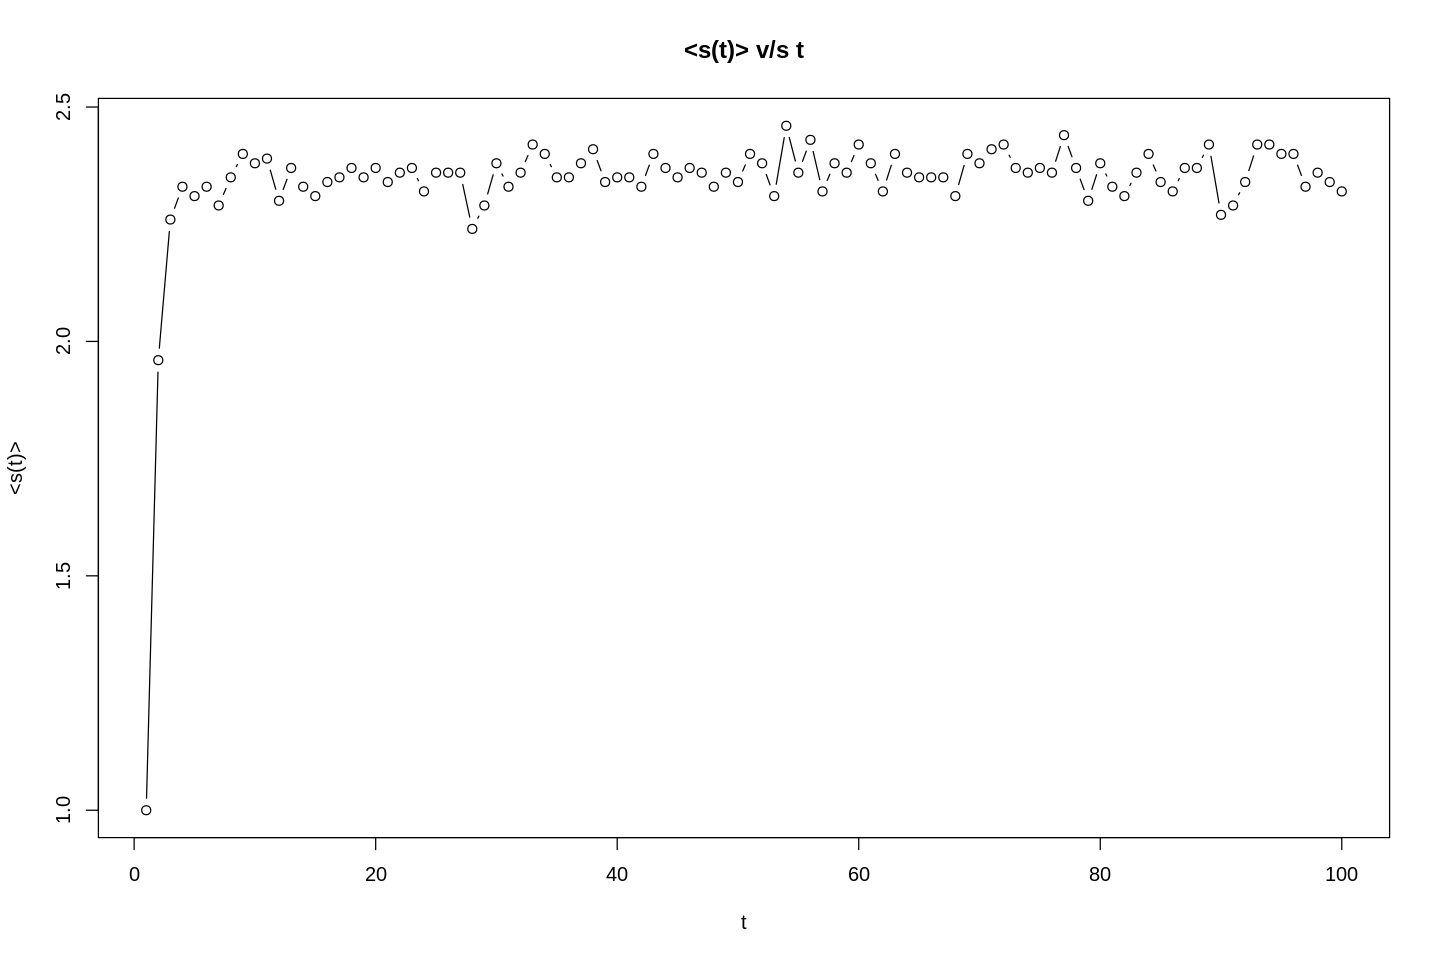

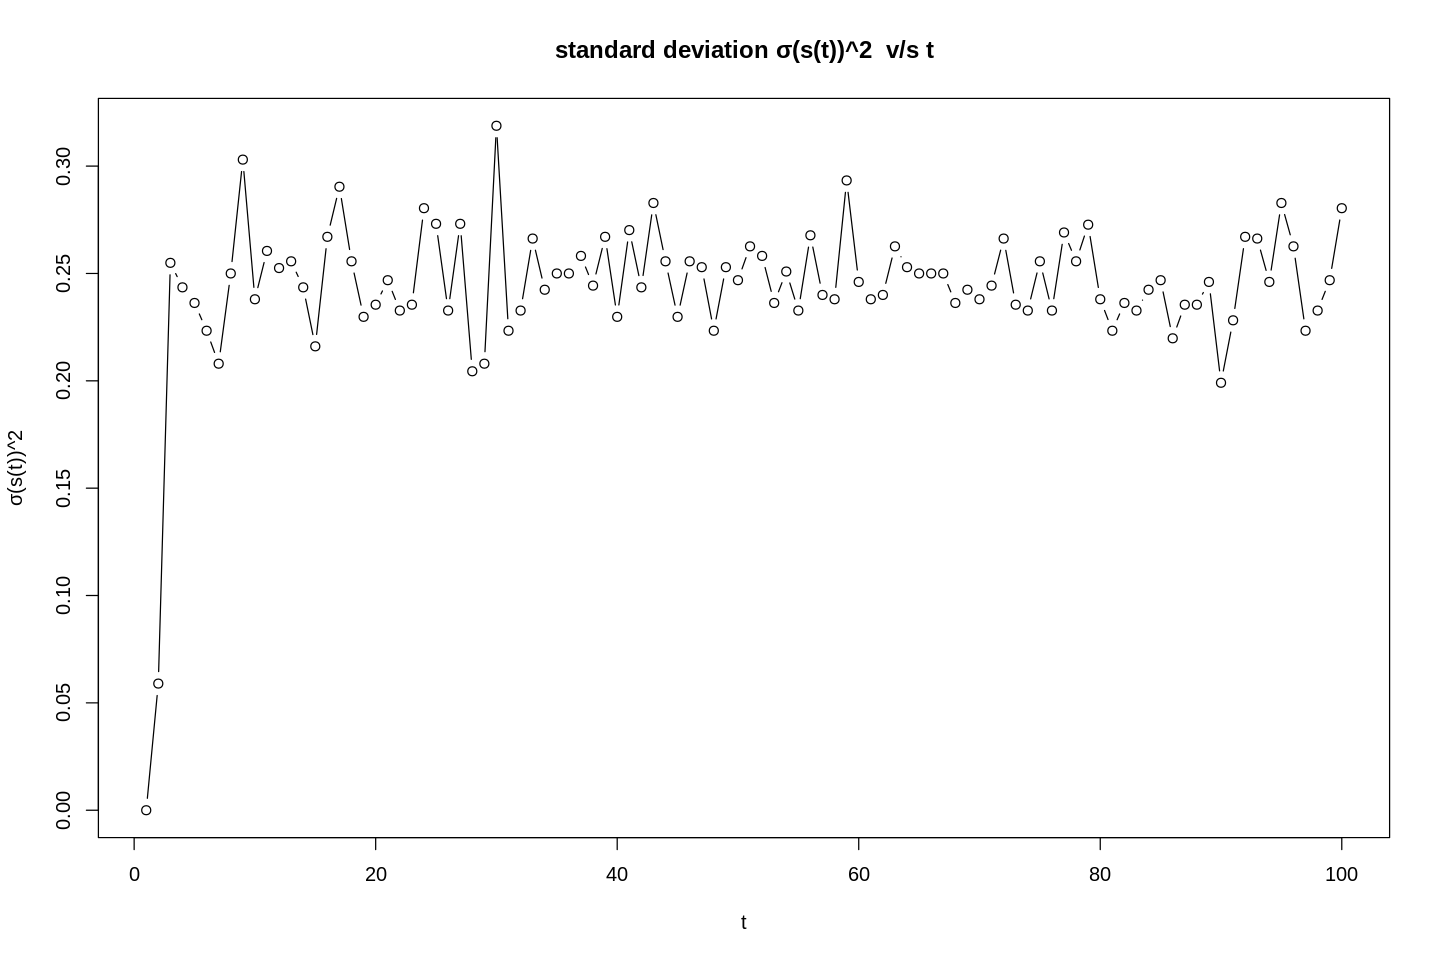

In [138]:
#part 2.1.d) with num node 10000
num_nodes <- 10000
g2 = erdos.renyi.game(num_nodes, p=prob_conn, directed=F)
end_nodes <- stats_of_graph(g2,num_steps,iter)